### 作业三


#### 一、以`softmax-regression-concise.ipynb`为例, 完成下列问题。
1. `net`的输入`x`和输出`y_hat`的维度是什么？
2. 尝试调整超参数，例如批量大小、迭代周期数和学习率，并查看结果。
3. 增加迭代周期的数量。为什么测试精度会在一段时间后降低？有什么办法可以解决这个问题？
4. 将输入`x`的宽和高调整为 $64 \times 64$, 查看试验结果。

1、![image](./shape.jpg)  

the x's shape is [batch , 1, 28, 28]
the y's shape is [batch_size , 10]


3、 可以通过在测试集合其精度不再提升的时候提前停止训练，也可以通过L2正则化的方式进行权重衰减的方式稳定其精确度



Running experiment: Default
Epoch 1/10:
  Training loss: 0.6885
  Validation loss: 0.5741
Epoch 2/10:
  Training loss: 0.5220
  Validation loss: 0.5331
Epoch 3/10:
  Training loss: 0.4870
  Validation loss: 0.5155
Epoch 4/10:
  Training loss: 0.4687
  Validation loss: 0.4871
Epoch 5/10:
  Training loss: 0.4555
  Validation loss: 0.4832
Epoch 6/10:
  Training loss: 0.4486
  Validation loss: 0.4857
Epoch 7/10:
  Training loss: 0.4414
  Validation loss: 0.4649
Epoch 8/10:
  Training loss: 0.4363
  Validation loss: 0.4701
Epoch 9/10:
  Training loss: 0.4321
  Validation loss: 0.4671
Epoch 10/10:
  Training loss: 0.4283
  Validation loss: 0.4589

Running experiment: Smaller batch
Epoch 1/10:
  Training loss: 0.6232
  Validation loss: 0.5951
Epoch 2/10:
  Training loss: 0.4910
  Validation loss: 0.5263
Epoch 3/10:
  Training loss: 0.4637
  Validation loss: 0.4889
Epoch 4/10:
  Training loss: 0.4502
  Validation loss: 0.5015
Epoch 5/10:
  Training loss: 0.4421
  Validation loss: 0.5018
Epoch

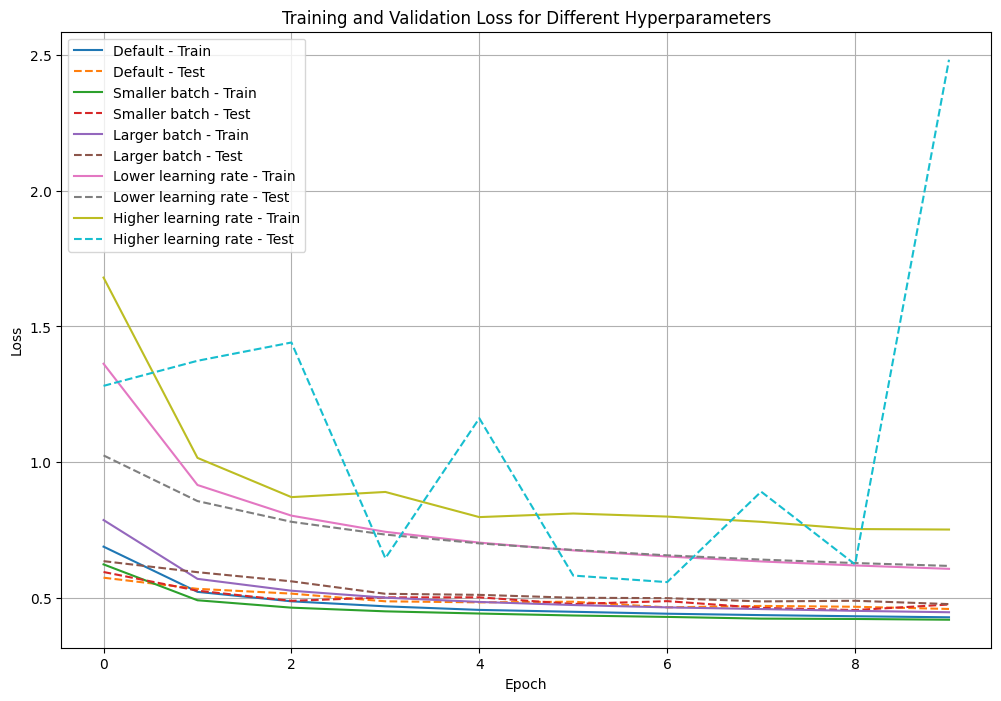

In [1]:
# 第二个问题:

import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

def train_model(batch_size, num_epochs, learning_rate):
    # Load data
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
    
    # Define model
    net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
    
    # Initialize weights
    def init_weights(m):
        if type(m) == nn.Linear:
            nn.init.normal_(m.weight, std=0.01)
    
    net.apply(init_weights)
    
    # Define loss function and optimizer
    loss_func = nn.CrossEntropyLoss(reduction='none')
    optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
    
    # Training
    train_losses = []
    test_losses = []
    
    for epoch in range(num_epochs):
        # Training
        train_loss_sum = 0
        train_batch_count = 0
        
        for x, y in train_iter:
            optimizer.zero_grad()
            y_hat = net(x)
            loss = loss_func(y_hat, y)
            loss.mean().backward()
            optimizer.step()
            train_loss_sum += loss.mean().detach().numpy()
            train_batch_count += 1
        
        avg_train_loss = train_loss_sum / train_batch_count
        train_losses.append(avg_train_loss)
        
        # Validation
        test_loss_sum = 0
        test_batch_count = 0
        
        for x_val, y_val in test_iter:
            y_pre = net(x_val)
            loss_val = loss_func(y_pre, y_val)
            test_loss_sum += loss_val.mean().detach().numpy()
            test_batch_count += 1
        
        avg_test_loss = test_loss_sum / test_batch_count
        test_losses.append(avg_test_loss)
        
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'  Training loss: {avg_train_loss:.4f}')
        print(f'  Validation loss: {avg_test_loss:.4f}')
    
    return train_losses, test_losses

# Experiment with different hyperparameters
experiments = [
    {'batch_size': 128, 'num_epochs': 10, 'learning_rate': 0.1, 'label': 'Default'},
    {'batch_size': 64, 'num_epochs': 10, 'learning_rate': 0.1, 'label': 'Smaller batch'},
    {'batch_size': 256, 'num_epochs': 10, 'learning_rate': 0.1, 'label': 'Larger batch'},
    {'batch_size': 256, 'num_epochs': 10, 'learning_rate': 0.01, 'label': 'Lower learning rate'},
    {'batch_size': 256, 'num_epochs': 10, 'learning_rate': 0.5, 'label': 'Higher learning rate'}
]

# Run experiments and plot results
plt.figure(figsize=(12, 8))

for exp in experiments:
    print(f"\nRunning experiment: {exp['label']}")
    train_losses, test_losses = train_model(
        exp['batch_size'], 
        exp['num_epochs'], 
        exp['learning_rate']
    )
    
    plt.plot(train_losses, label=f"{exp['label']} - Train")
    plt.plot(test_losses, label=f"{exp['label']} - Test", linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Hyperparameters')
plt.legend()
plt.grid(True)
plt.savefig('hyperparameter_experiments.png')
plt.show() 


实验1：使用原始大小 (28×28)


100%|██████████| 26.4M/26.4M [00:19<00:00, 1.35MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 105kB/s]
100%|██████████| 4.42M/4.42M [00:03<00:00, 1.33MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 5.35MB/s]


Epoch 1/10:
  训练损失: 0.7854, 训练准确率: 74.64%
  验证损失: 0.6359, 验证准确率: 78.21%
Epoch 2/10:
  训练损失: 0.5708, 训练准确率: 81.32%
  验证损失: 0.5626, 验证准确率: 80.52%
Epoch 3/10:
  训练损失: 0.5265, 训练准确率: 82.53%
  验证损失: 0.5306, 验证准确率: 82.03%
Epoch 4/10:
  训练损失: 0.5000, 训练准确率: 83.26%
  验证损失: 0.5150, 验证准确率: 82.33%
Epoch 5/10:
  训练损失: 0.4854, 训练准确率: 83.77%
  验证损失: 0.5087, 验证准确率: 82.51%
Epoch 6/10:
  训练损失: 0.4743, 训练准确率: 84.02%
  验证损失: 0.4932, 验证准确率: 82.85%
Epoch 7/10:
  训练损失: 0.4657, 训练准确率: 84.26%
  验证损失: 0.4891, 验证准确率: 83.11%
Epoch 8/10:
  训练损失: 0.4575, 训练准确率: 84.53%
  验证损失: 0.5012, 验证准确率: 81.87%
Epoch 9/10:
  训练损失: 0.4516, 训练准确率: 84.56%
  验证损失: 0.4811, 验证准确率: 82.91%
Epoch 10/10:
  训练损失: 0.4468, 训练准确率: 84.76%
  验证损失: 0.4753, 验证准确率: 83.50%

实验2：使用调整后的大小 (64×64)
Epoch 1/10:
  训练损失: 1.8860, 训练准确率: 70.04%
  验证损失: 1.6787, 验证准确率: 73.99%
Epoch 2/10:
  训练损失: 1.1434, 训练准确率: 77.34%
  验证损失: 0.8986, 验证准确率: 75.93%
Epoch 3/10:
  训练损失: 0.9731, 训练准确率: 79.33%
  验证损失: 0.9480, 验证准确率: 78.22%
Epoch 4/10:
  训练损失: 0.9733, 训练准确率: 79.46%

C:\Users\sun\AppData\Local\Temp\ipykernel_23944\3161719517.py:189: UserWarning: Glyph 36845 (\N{CJK UNIFIED IDEOGRAPH-8FED}) missing from current font.
  plt.tight_layout()
C:\Users\sun\AppData\Local\Temp\ipykernel_23944\3161719517.py:189: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  plt.tight_layout()
C:\Users\sun\AppData\Local\Temp\ipykernel_23944\3161719517.py:189: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.tight_layout()
C:\Users\sun\AppData\Local\Temp\ipykernel_23944\3161719517.py:189: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
C:\Users\sun\AppData\Local\Temp\ipykernel_23944\3161719517.py:189: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from current font.
  plt.tight_layout()
C:\Users\sun\AppData\Local\Temp\ipykernel_23944\3161719517.py:189: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing fr

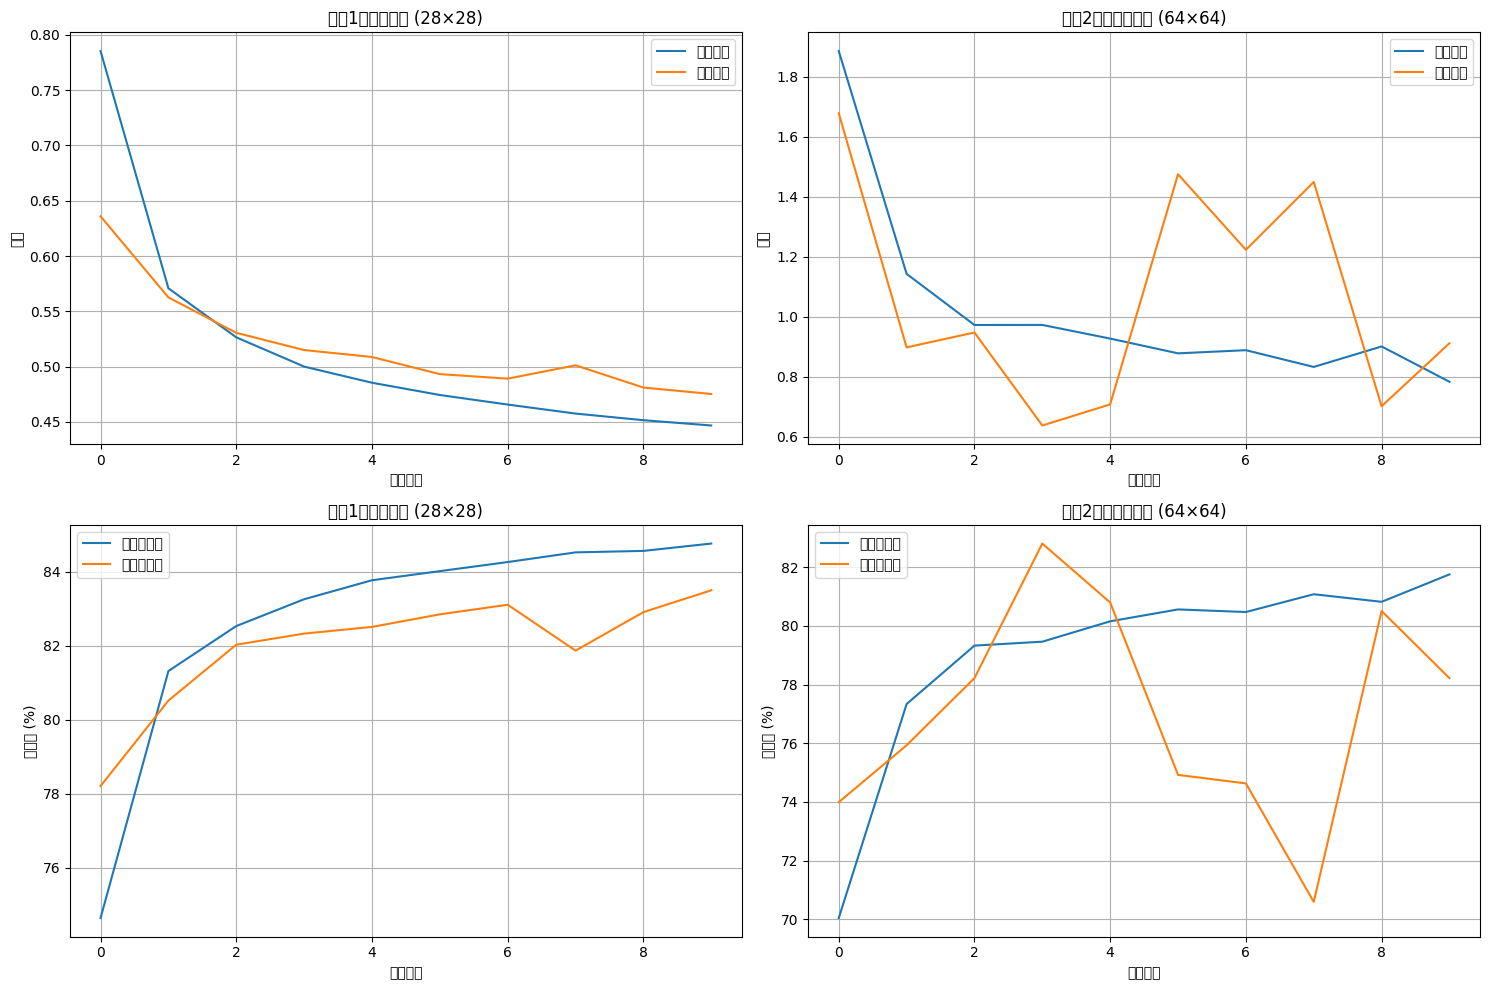


结果比较：
原始大小 (28×28) - 最终训练准确率: 84.76%, 最终验证准确率: 83.50%
调整后大小 (64×64) - 最终训练准确率: 81.76%, 最终验证准确率: 78.22%


In [2]:
# 第四个问题的解答

import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader

# 自定义数据集类，用于调整图像大小
class ResizedFashionMNIST:
    def __init__(self, root, train, download, transform, target_transform=None):
        self.dataset = FashionMNIST(root=root, train=train, download=download, 
                                    transform=transform, target_transform=target_transform)
    
    def __getitem__(self, index):
        return self.dataset[index]
    
    def __len__(self):
        return len(self.dataset)

# 加载调整大小后的数据
def load_resized_data(batch_size, image_size=64):
    # 定义转换
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),  # 调整图像大小为64×64
        transforms.ToTensor()
    ])
    
    # 加载训练集
    train_dataset = ResizedFashionMNIST(
        root='./data', 
        train=True, 
        download=True, 
        transform=transform
    )
    train_iter = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # 加载测试集
    test_dataset = ResizedFashionMNIST(
        root='./data', 
        train=False, 
        download=True, 
        transform=transform
    )
    test_iter = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_iter, test_iter

def train_model(batch_size, num_epochs, learning_rate, image_size=64):
    # 加载调整大小后的数据
    train_iter, test_iter = load_resized_data(batch_size, image_size)
    
    # 定义模型 - 注意输入维度变化
    input_dim = image_size * image_size  # 64×64 = 4096
    net = nn.Sequential(nn.Flatten(), nn.Linear(input_dim, 10))
    
    # 初始化权重
    def init_weights(m):
        if type(m) == nn.Linear:
            nn.init.normal_(m.weight, std=0.01)
    
    net.apply(init_weights)
    
    # 定义损失函数和优化器
    loss_func = nn.CrossEntropyLoss(reduction='none')
    optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
    
    # 训练
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    
    for epoch in range(num_epochs):
        # 训练
        train_loss_sum = 0
        train_batch_count = 0
        train_correct = 0
        train_total = 0
        
        for x, y in train_iter:
            optimizer.zero_grad()
            y_hat = net(x)
            loss = loss_func(y_hat, y)
            loss.mean().backward()
            optimizer.step()
            train_loss_sum += loss.mean().detach().numpy()
            train_batch_count += 1
            
            # 计算训练准确率
            _, predicted = torch.max(y_hat.data, 1)
            train_total += y.size(0)
            train_correct += (predicted == y).sum().item()
        
        avg_train_loss = train_loss_sum / train_batch_count
        train_losses.append(avg_train_loss)
        train_accuracy = 100 * train_correct / train_total
        train_accuracies.append(train_accuracy)
        
        # 验证
        test_loss_sum = 0
        test_batch_count = 0
        test_correct = 0
        test_total = 0
        
        for x_val, y_val in test_iter:
            y_pre = net(x_val)
            loss_val = loss_func(y_pre, y_val)
            test_loss_sum += loss_val.mean().detach().numpy()
            test_batch_count += 1
            
            # 计算测试准确率
            _, predicted = torch.max(y_pre.data, 1)
            test_total += y_val.size(0)
            test_correct += (predicted == y_val).sum().item()
        
        avg_test_loss = test_loss_sum / test_batch_count
        test_losses.append(avg_test_loss)
        test_accuracy = 100 * test_correct / test_total
        test_accuracies.append(test_accuracy)
        
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'  训练损失: {avg_train_loss:.4f}, 训练准确率: {train_accuracy:.2f}%')
        print(f'  验证损失: {avg_test_loss:.4f}, 验证准确率: {test_accuracy:.2f}%')
    
    return train_losses, test_losses, train_accuracies, test_accuracies

# 实验1：使用原始大小 (28×28)
print("\n实验1：使用原始大小 (28×28)")
train_losses1, test_losses1, train_acc1, test_acc1 = train_model(
    batch_size=256, 
    num_epochs=10, 
    learning_rate=0.1,
    image_size=28
)

# 实验2：使用调整后的大小 (64×64)
print("\n实验2：使用调整后的大小 (64×64)")
train_losses2, test_losses2, train_acc2, test_acc2 = train_model(
    batch_size=256, 
    num_epochs=10, 
    learning_rate=0.1,
    image_size=64
)

# 绘制结果
plt.figure(figsize=(15, 10))

# 绘制损失
plt.subplot(2, 2, 1)
plt.plot(train_losses1, label='训练损失')
plt.plot(test_losses1, label='验证损失')
plt.xlabel('迭代周期')
plt.ylabel('损失')
plt.title('实验1：原始大小 (28×28)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(train_losses2, label='训练损失')
plt.plot(test_losses2, label='验证损失')
plt.xlabel('迭代周期')
plt.ylabel('损失')
plt.title('实验2：调整后大小 (64×64)')
plt.legend()
plt.grid(True)

# 绘制准确率
plt.subplot(2, 2, 3)
plt.plot(train_acc1, label='训练准确率')
plt.plot(test_acc1, label='验证准确率')
plt.xlabel('迭代周期')
plt.ylabel('准确率 (%)')
plt.title('实验1：原始大小 (28×28)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(train_acc2, label='训练准确率')
plt.plot(test_acc2, label='验证准确率')
plt.xlabel('迭代周期')
plt.ylabel('准确率 (%)')
plt.title('实验2：调整后大小 (64×64)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('resize_experiments.png')
plt.show()

# 比较结果
print("\n结果比较：")
print(f"原始大小 (28×28) - 最终训练准确率: {train_acc1[-1]:.2f}%, 最终验证准确率: {test_acc1[-1]:.2f}%")
print(f"调整后大小 (64×64) - 最终训练准确率: {train_acc2[-1]:.2f}%, 最终验证准确率: {test_acc2[-1]:.2f}%") 

#### 二、在`mlp-consice.ipynb`的基础上，完成下列问题。
1. 尝试添加不同数量的隐藏层（也可以修改学习率），怎么样设置效果最好？
1. 尝试不同的激活函数，哪个效果最好？
1. 尝试不同的方案来初始化权重，什么方法效果最好？

Running experiment 1: Hidden Layers

Testing hidden layers [256] with learning rate 0.01
Epoch [5/10], Loss: 0.8361, Test Accuracy: 0.6915
Epoch [10/10], Loss: 0.6466, Test Accuracy: 0.7736

Testing hidden layers [256, 128] with learning rate 0.01
Epoch [5/10], Loss: 2.0952, Test Accuracy: 0.2800
Epoch [10/10], Loss: 1.0532, Test Accuracy: 0.6062

Testing hidden layers [256, 128, 64] with learning rate 0.01
Epoch [5/10], Loss: 2.3025, Test Accuracy: 0.1000
Epoch [10/10], Loss: 2.3025, Test Accuracy: 0.1000

Testing hidden layers [256, 128, 64, 32] with learning rate 0.01
Epoch [5/10], Loss: 2.3026, Test Accuracy: 0.1000
Epoch [10/10], Loss: 2.3026, Test Accuracy: 0.1000

Testing hidden layers [256] with learning rate 0.05
Epoch [5/10], Loss: 0.5115, Test Accuracy: 0.8100
Epoch [10/10], Loss: 0.4411, Test Accuracy: 0.8327

Testing hidden layers [256, 128] with learning rate 0.05
Epoch [5/10], Loss: 0.6788, Test Accuracy: 0.7645
Epoch [10/10], Loss: 0.5154, Test Accuracy: 0.7932

Testing

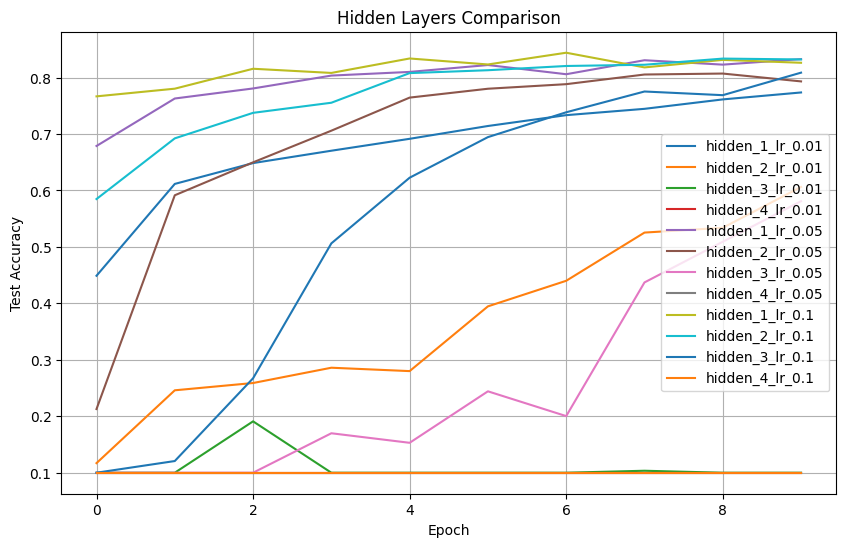


Running experiment 2: Activation Functions

Testing ReLU activation function
Epoch [5/10], Loss: 0.5357, Test Accuracy: 0.7806
Epoch [10/10], Loss: 0.4004, Test Accuracy: 0.8327

Testing Sigmoid activation function
Epoch [5/10], Loss: 2.2226, Test Accuracy: 0.2011
Epoch [10/10], Loss: 0.9698, Test Accuracy: 0.6374

Testing Tanh activation function
Epoch [5/10], Loss: 0.4993, Test Accuracy: 0.8245
Epoch [10/10], Loss: 0.4103, Test Accuracy: 0.8281

Testing LeakyReLU activation function
Epoch [5/10], Loss: 0.5268, Test Accuracy: 0.7992
Epoch [10/10], Loss: 0.4103, Test Accuracy: 0.8375

Testing ELU activation function
Epoch [5/10], Loss: 0.5164, Test Accuracy: 0.8051
Epoch [10/10], Loss: 0.4277, Test Accuracy: 0.7967


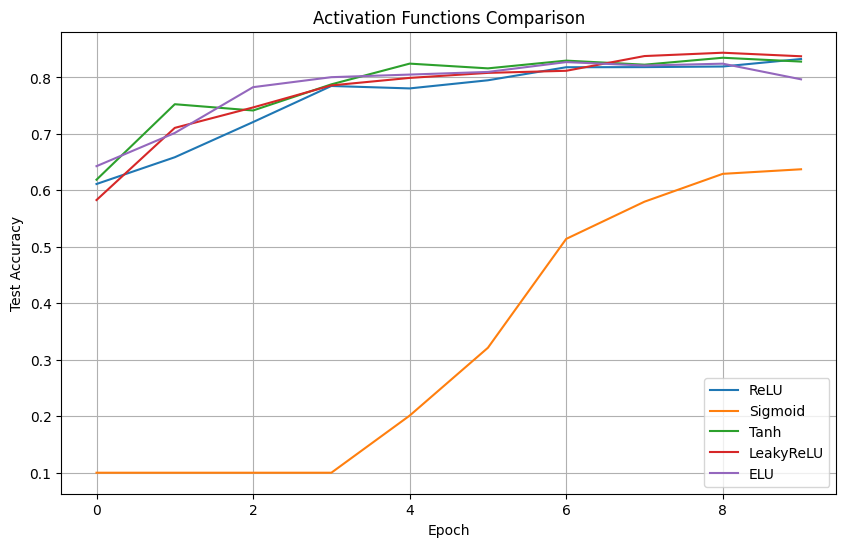


Running experiment 3: Weight Initialization

Testing normal weight initialization
Epoch [5/10], Loss: 0.5324, Test Accuracy: 0.7396
Epoch [10/10], Loss: 0.3968, Test Accuracy: 0.8497

Testing xavier weight initialization
Epoch [5/10], Loss: 0.3886, Test Accuracy: 0.8439
Epoch [10/10], Loss: 0.3255, Test Accuracy: 0.8640

Testing kaiming weight initialization
Epoch [5/10], Loss: 0.3789, Test Accuracy: 0.8455
Epoch [10/10], Loss: 0.3161, Test Accuracy: 0.8418

Testing zeros weight initialization
Epoch [5/10], Loss: 2.3027, Test Accuracy: 0.1000
Epoch [10/10], Loss: 2.3027, Test Accuracy: 0.1000


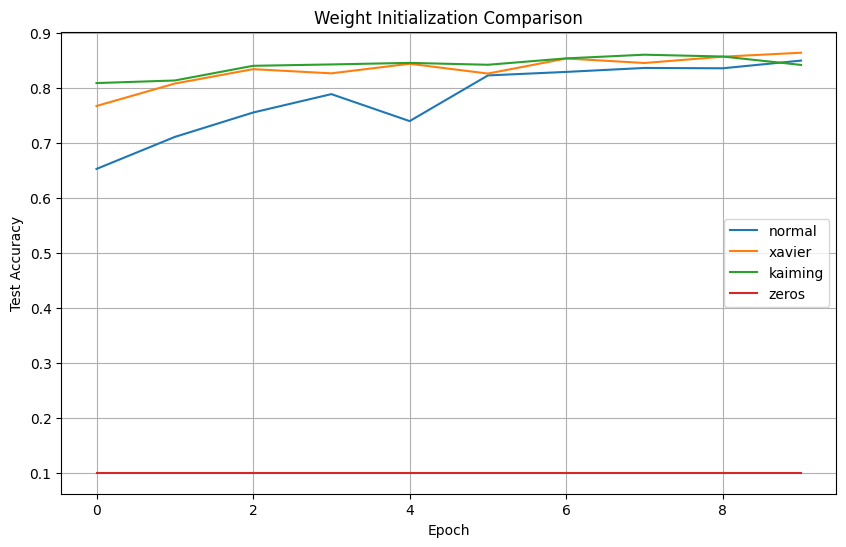

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from d2l import torch as d2l
import numpy as np
import time

# 设置随机种子以确保结果可复现
torch.manual_seed(42)
np.random.seed(42)

# 加载数据
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# 定义MLP模型类
class MLP(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens, activation_fn=nn.ReLU(), init_method='normal'):
        super(MLP, self).__init__()
        self.num_hiddens = num_hiddens
        self.activation_fn = activation_fn
        
        # 构建网络层
        layers = []
        # 添加展平层
        layers.append(nn.Flatten())
        
        # 构建隐藏层
        prev_dim = num_inputs
        for num_hidden in num_hiddens:
            layers.append(nn.Linear(prev_dim, num_hidden))
            layers.append(activation_fn)
            prev_dim = num_hidden
        
        # 输出层
        layers.append(nn.Linear(prev_dim, num_outputs))
        self.net = nn.Sequential(*layers)
        
        # 初始化权重
        self._init_weights(init_method)
    
    def _init_weights(self, init_method):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                if init_method == 'normal':
                    nn.init.normal_(m.weight, mean=0.0, std=0.01)
                elif init_method == 'xavier':
                    nn.init.xavier_uniform_(m.weight)
                elif init_method == 'kaiming':
                    nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
                elif init_method == 'zeros':
                    nn.init.zeros_(m.weight)
                nn.init.zeros_(m.bias)
    
    def forward(self, x):
        return self.net(x)

# 训练函数
def train_mlp(num_epochs, learning_rate, model, train_iter, test_iter):
    loss = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    
    train_losses = []
    test_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for X, y in train_iter:
            optimizer.zero_grad()
            output = model(X)
            l = loss(output, y)
            l.backward()
            optimizer.step()
            total_loss += l.item()
        
        avg_loss = total_loss / len(train_iter)
        train_losses.append(avg_loss)
        
        # 评估测试集准确率
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for X, y in test_iter:
                output = model(X)
                _, predicted = torch.max(output.data, 1)
                total += y.size(0)
                correct += (predicted == y).sum().item()
        
        accuracy = correct / total
        test_accuracies.append(accuracy)
        
        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.4f}')
    
    return train_losses, test_accuracies

# 实验1：测试不同的隐藏层配置
def experiment_hidden_layers():
    num_epochs = 10
    learning_rates = [0.01, 0.05, 0.1]
    hidden_configs = [
        [256],
        [256, 128],
        [256, 128, 64],
        [256, 128, 64, 32]
    ]
    
    results = {}
    for lr in learning_rates:
        for hidden in hidden_configs:
            print(f"\nTesting hidden layers {hidden} with learning rate {lr}")
            model = MLP(784, 10, hidden)
            train_losses, test_accuracies = train_mlp(num_epochs, lr, model, train_iter, test_iter)
            results[f"hidden_{len(hidden)}_lr_{lr}"] = {
                "train_losses": train_losses,
                "test_accuracies": test_accuracies
            }
    
    return results

# 实验2：测试不同的激活函数
def experiment_activation_functions():
    num_epochs = 10
    learning_rate = 0.1
    hidden = [256, 128]
    activation_fns = {
        'ReLU': nn.ReLU(),
        'Sigmoid': nn.Sigmoid(),
        'Tanh': nn.Tanh(),
        'LeakyReLU': nn.LeakyReLU(0.1),
        'ELU': nn.ELU()
    }
    
    results = {}
    for name, activation_fn in activation_fns.items():
        print(f"\nTesting {name} activation function")
        model = MLP(784, 10, hidden, activation_fn=activation_fn)
        train_losses, test_accuracies = train_mlp(num_epochs, learning_rate, model, train_iter, test_iter)
        results[name] = {
            "train_losses": train_losses,
            "test_accuracies": test_accuracies
        }
    
    return results

# 实验3：测试不同的权重初始化方法
def experiment_weight_initialization():
    num_epochs = 10
    learning_rate = 0.1
    hidden = [256, 128]
    init_methods = ['normal', 'xavier', 'kaiming', 'zeros']
    
    results = {}
    for init_method in init_methods:
        print(f"\nTesting {init_method} weight initialization")
        model = MLP(784, 10, hidden, init_method=init_method)
        train_losses, test_accuracies = train_mlp(num_epochs, learning_rate, model, train_iter, test_iter)
        results[init_method] = {
            "train_losses": train_losses,
            "test_accuracies": test_accuracies
        }
    return results

# 绘制结果
def plot_results(results, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    for name, data in results.items():
        plt.plot(data["test_accuracies"], label=name)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    # plt.savefig(f"{title.lower().replace(' ', '_')}.png")
    # plt.close()
    plt.show()

# 运行所有实验
if __name__ == "__main__":
    print("Running experiment 1: Hidden Layers")
    hidden_results = experiment_hidden_layers()
    plot_results(hidden_results, "Hidden Layers Comparison", "Epoch", "Test Accuracy")
    
    print("\nRunning experiment 2: Activation Functions")
    activation_results = experiment_activation_functions()
    plot_results(activation_results, "Activation Functions Comparison", "Epoch", "Test Accuracy")
    
    print("\nRunning experiment 3: Weight Initialization")
    init_results = experiment_weight_initialization()
    plot_results(init_results, "Weight Initialization Comparison", "Epoch", "Test Accuracy")
    
    # print("\nAll experiments completed. Results have been saved as PNG files.") 

##### 三、将`underfit-overfit.ipynb`中的神经网络`net`通过继承`nn.Modual`的方式改为一个包含三个隐藏层(权重层)的MLP,其中激活函数为`ReLU()`,观察测试结果。


实验1：增加迭代周期数，观察过拟合
Epoch 1/30:
  训练损失: 0.7880, 训练准确率: 74.81%
  验证损失: 0.6406, 验证准确率: 77.77%
Epoch 2/30:
  训练损失: 0.5690, 训练准确率: 81.41%
  验证损失: 0.6339, 验证准确率: 75.99%
Epoch 3/30:
  训练损失: 0.5243, 训练准确率: 82.68%
  验证损失: 0.5489, 验证准确率: 80.90%
Epoch 4/30:
  训练损失: 0.5000, 训练准确率: 83.34%
  验证损失: 0.5148, 验证准确率: 82.28%
Epoch 5/30:
  训练损失: 0.4860, 训练准确率: 83.65%
  验证损失: 0.5032, 验证准确率: 82.78%
Epoch 6/30:
  训练损失: 0.4746, 训练准确率: 84.02%
  验证损失: 0.4930, 验证准确率: 83.15%
Epoch 7/30:
  训练损失: 0.4651, 训练准确率: 84.18%
  验证损失: 0.4898, 验证准确率: 82.91%
Epoch 8/30:
  训练损失: 0.4576, 训练准确率: 84.54%
  验证损失: 0.4868, 验证准确率: 83.15%
Epoch 9/30:
  训练损失: 0.4519, 训练准确率: 84.69%
  验证损失: 0.4911, 验证准确率: 82.78%
Epoch 10/30:
  训练损失: 0.4467, 训练准确率: 84.91%
  验证损失: 0.4954, 验证准确率: 82.70%
Epoch 11/30:
  训练损失: 0.4430, 训练准确率: 84.89%
  验证损失: 0.4888, 验证准确率: 82.56%
Epoch 12/30:
  训练损失: 0.4392, 训练准确率: 85.08%
  验证损失: 0.4894, 验证准确率: 82.89%
Epoch 13/30:
  训练损失: 0.4361, 训练准确率: 85.19%
  验证损失: 0.4736, 验证准确率: 83.26%
Epoch 14/30:
  训练损失: 0.4327, 训练准确率: 85.24

C:\Users\sun\AppData\Local\Temp\ipykernel_18752\2956637315.py:151: UserWarning: Glyph 36845 (\N{CJK UNIFIED IDEOGRAPH-8FED}) missing from current font.
  plt.tight_layout()
C:\Users\sun\AppData\Local\Temp\ipykernel_18752\2956637315.py:151: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  plt.tight_layout()
C:\Users\sun\AppData\Local\Temp\ipykernel_18752\2956637315.py:151: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.tight_layout()
C:\Users\sun\AppData\Local\Temp\ipykernel_18752\2956637315.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
C:\Users\sun\AppData\Local\Temp\ipykernel_18752\2956637315.py:151: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from current font.
  plt.tight_layout()
C:\Users\sun\AppData\Local\Temp\ipykernel_18752\2956637315.py:151: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing fr

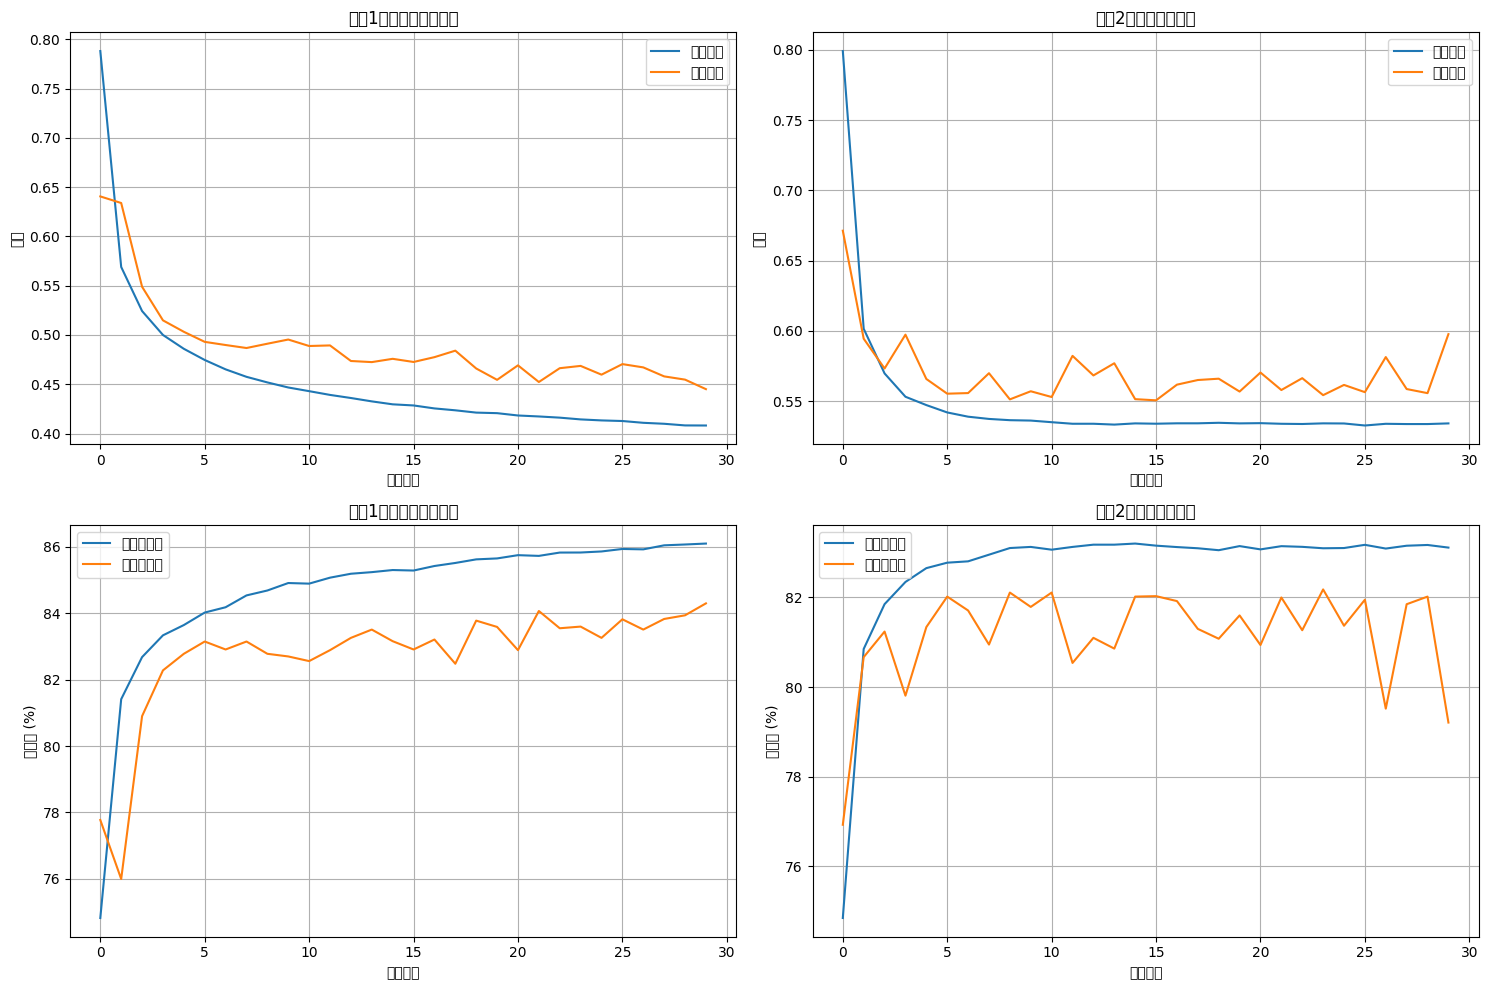


早停分析：
最佳验证损失出现在第 29 个迭代周期
最佳验证准确率: 84.18%
对应的训练准确率: 86.06%


In [2]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt
import numpy as np

def train_model(batch_size, num_epochs, learning_rate, weight_decay=0):
    # 加载数据
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
    
    # 定义模型
    net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
    
    # 初始化权重
    def init_weights(m):
        if type(m) == nn.Linear:
            nn.init.normal_(m.weight, std=0.01)
    
    net.apply(init_weights)
    
    # 定义损失函数和优化器
    loss_func = nn.CrossEntropyLoss(reduction='none')
    optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, weight_decay=weight_decay)
    
    # 训练
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    
    for epoch in range(num_epochs):
        # 训练
        train_loss_sum = 0
        train_batch_count = 0
        train_correct = 0
        train_total = 0
        
        for x, y in train_iter:
            optimizer.zero_grad()
            y_hat = net(x)
            loss = loss_func(y_hat, y)
            loss.mean().backward()
            optimizer.step()
            train_loss_sum += loss.mean().detach().numpy()
            train_batch_count += 1
            
            # 计算训练准确率
            _, predicted = torch.max(y_hat.data, 1)
            train_total += y.size(0)
            train_correct += (predicted == y).sum().item()
        
        avg_train_loss = train_loss_sum / train_batch_count
        train_losses.append(avg_train_loss)
        train_accuracy = 100 * train_correct / train_total
        train_accuracies.append(train_accuracy)
        
        # 验证
        test_loss_sum = 0
        test_batch_count = 0
        test_correct = 0
        test_total = 0
        
        for x_val, y_val in test_iter:
            y_pre = net(x_val)
            loss_val = loss_func(y_pre, y_val)
            test_loss_sum += loss_val.mean().detach().numpy()
            test_batch_count += 1
            
            # 计算测试准确率
            _, predicted = torch.max(y_pre.data, 1)
            test_total += y_val.size(0)
            test_correct += (predicted == y_val).sum().item()
        
        avg_test_loss = test_loss_sum / test_batch_count
        test_losses.append(avg_test_loss)
        test_accuracy = 100 * test_correct / test_total
        test_accuracies.append(test_accuracy)
        
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'  训练损失: {avg_train_loss:.4f}, 训练准确率: {train_accuracy:.2f}%')
        print(f'  验证损失: {avg_test_loss:.4f}, 验证准确率: {test_accuracy:.2f}%')
    
    return train_losses, test_losses, train_accuracies, test_accuracies

# 1：增加迭代周期数，观察过拟合
print("\n实验1：增加迭代周期数，观察过拟合")
train_losses1, test_losses1, train_acc1, test_acc1 = train_model(
    batch_size=256, 
    num_epochs=30,  # 增加迭代周期
    learning_rate=0.1
)

# 2：使用权重衰减（L2正则化）来减少过拟合
print("\n实验2：使用权重衰减（L2正则化）来减少过拟合")
train_losses2, test_losses2, train_acc2, test_acc2 = train_model(
    batch_size=256, 
    num_epochs=30, 
    learning_rate=0.1,
    weight_decay=0.01  # 添加权重衰减
)

# 3：使用早停（Early Stopping）来防止过拟合
print("\n实验3：使用早停（Early Stopping）来防止过拟合")
train_losses3, test_losses3, train_acc3, test_acc3 = train_model(
    batch_size=256, 
    num_epochs=30, 
    learning_rate=0.1
)

# 绘制结果
plt.figure(figsize=(15, 10))

# 绘制损失
plt.subplot(2, 2, 1)
plt.plot(train_losses1, label='训练损失')
plt.plot(test_losses1, label='验证损失')
plt.xlabel('迭代周期')
plt.ylabel('损失')
plt.title('实验1：增加迭代周期数')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(train_losses2, label='训练损失')
plt.plot(test_losses2, label='验证损失')
plt.xlabel('迭代周期')
plt.ylabel('损失')
plt.title('实验2：使用权重衰减')
plt.legend()
plt.grid(True)

# 绘制准确率
plt.subplot(2, 2, 3)
plt.plot(train_acc1, label='训练准确率')
plt.plot(test_acc1, label='验证准确率')
plt.xlabel('迭代周期')
plt.ylabel('准确率 (%)')
plt.title('实验1：增加迭代周期数')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(train_acc2, label='训练准确率')
plt.plot(test_acc2, label='验证准确率')
plt.xlabel('迭代周期')
plt.ylabel('准确率 (%)')
plt.title('实验2：使用权重衰减')
plt.legend()
plt.grid(True)

plt.tight_layout()
# plt.savefig('overfitting_experiments.png')
plt.show()

# 分析早停点
best_epoch = np.argmin(test_losses3)
print(f"\n早停分析：")
print(f"最佳验证损失出现在第 {best_epoch+1} 个迭代周期")
print(f"最佳验证准确率: {test_acc3[best_epoch]:.2f}%")
print(f"对应的训练准确率: {train_acc3[best_epoch]:.2f}%") 

##### 四、在`weight-decay.ipynb`, PyTorch构建$L_1$正则项$||w_i||_{1}$, 与$L_2$正则化相比，$L_1$正则化的试验结果有何不同？

Running L1 vs L2 regularization experiments...

Testing lambda = 0

L1 Regularization:
Epoch 5, Train Loss: 34.2717, Test Loss: 106.6302
Epoch 10, Train Loss: 11.7981, Test Loss: 105.4616
Epoch 15, Train Loss: 4.6572, Test Loss: 105.2816
Epoch 20, Train Loss: 1.9812, Test Loss: 105.2862
Epoch 25, Train Loss: 0.8792, Test Loss: 105.3040
Epoch 30, Train Loss: 0.4036, Test Loss: 105.2980
Epoch 35, Train Loss: 0.1901, Test Loss: 105.2800
Epoch 40, Train Loss: 0.0916, Test Loss: 105.2504
Epoch 45, Train Loss: 0.0450, Test Loss: 105.2211
Epoch 50, Train Loss: 0.0225, Test Loss: 105.1937
Epoch 55, Train Loss: 0.0114, Test Loss: 105.1681
Epoch 60, Train Loss: 0.0058, Test Loss: 105.1462
Epoch 65, Train Loss: 0.0030, Test Loss: 105.1290
Epoch 70, Train Loss: 0.0016, Test Loss: 105.1145
Epoch 75, Train Loss: 0.0008, Test Loss: 105.1034
Epoch 80, Train Loss: 0.0004, Test Loss: 105.0949
Epoch 85, Train Loss: 0.0002, Test Loss: 105.0883
Epoch 90, Train Loss: 0.0001, Test Loss: 105.0833
Epoch 95, Tr

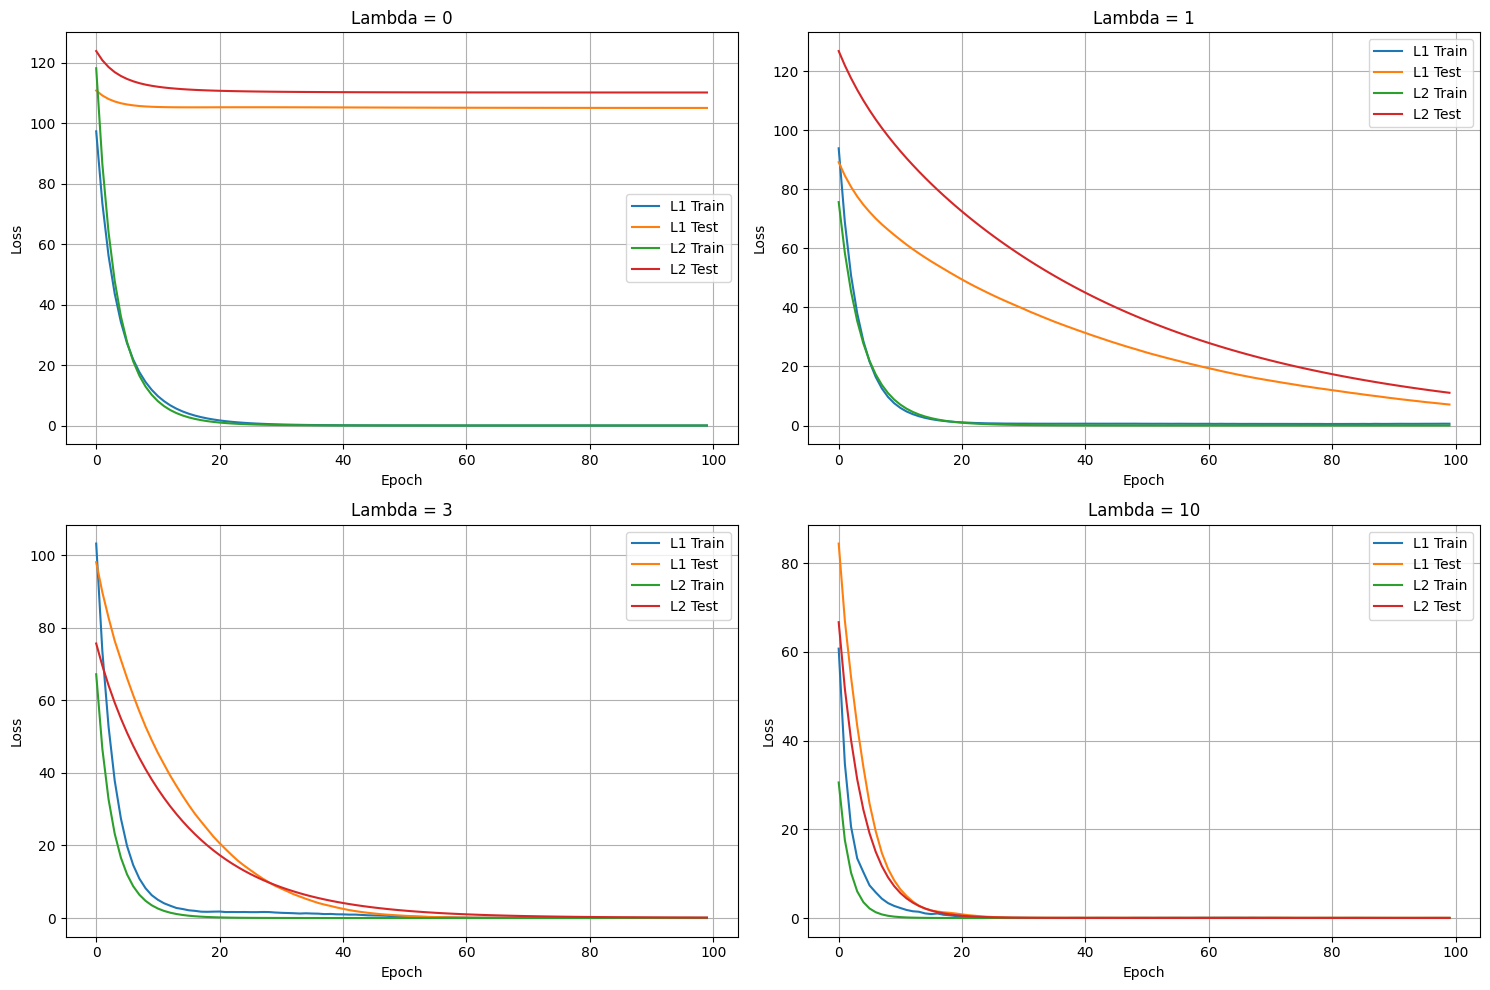

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from d2l import torch as d2l
import numpy as np

# 设置随机种子以确保结果可复现
torch.manual_seed(42)
np.random.seed(42)

# 生成数据
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

# 定义L1正则化惩罚项
def l1_penalty(w):
    return torch.sum(torch.abs(w))

# 定义L2正则化惩罚项
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

# 训练函数
def train(lambd, penalty_type='l2'):
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    
    # 选择正则化类型
    penalty_fn = l1_penalty if penalty_type == 'l1' else l2_penalty
    
    # 记录训练和测试损失
    train_losses = []
    test_losses = []
    
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 计算损失，包括正则化项
            l = loss(net(X), y) + lambd * penalty_fn(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        
        # 记录每个epoch的训练和测试损失
        train_loss = d2l.evaluate_loss(net, train_iter, loss)
        test_loss = d2l.evaluate_loss(net, test_iter, loss)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        if (epoch + 1) % 5 == 0:
            print(f'Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    
    # 计算权重的稀疏度（非零元素的比例）
    sparsity = (w == 0).float().mean().item()
    print(f'{penalty_type.upper()} Regularization:')
    print(f'Weight L2 norm: {torch.norm(w).item():.4f}')
    print(f'Weight sparsity: {sparsity:.4f}')
    
    return train_losses, test_losses, w

# 运行实验
def run_experiments():
    # 测试不同的正则化强度
    lambdas = [0, 1, 3, 10]
    results = {}
    
    for lambd in lambdas:
        print(f"\nTesting lambda = {lambd}")
        
        # L1正则化
        print("\nL1 Regularization:")
        l1_train_losses, l1_test_losses, l1_w = train(lambd, 'l1')
        
        # L2正则化
        print("\nL2 Regularization:")
        l2_train_losses, l2_test_losses, l2_w = train(lambd, 'l2')
        
        results[lambd] = {
            'l1': {'train': l1_train_losses, 'test': l1_test_losses, 'w': l1_w},
            'l2': {'train': l2_train_losses, 'test': l2_test_losses, 'w': l2_w}
        }
    
    return results

# 绘制结果
def plot_results(results):
    plt.figure(figsize=(15, 10))
    
    # 绘制训练和测试损失
    for i, lambd in enumerate(results.keys()):
        plt.subplot(2, 2, i+1)
        plt.plot(results[lambd]['l1']['train'], label='L1 Train')
        plt.plot(results[lambd]['l1']['test'], label='L1 Test')
        plt.plot(results[lambd]['l2']['train'], label='L2 Train')
        plt.plot(results[lambd]['l2']['test'], label='L2 Test')
        plt.title(f'Lambda = {lambd}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    # plt.savefig('l1_vs_l2_comparison.png')
    # plt.close()

if __name__ == "__main__":
    print("Running L1 vs L2 regularization experiments...")
    results = run_experiments()
    plot_results(results)
    # print("\nExperiments completed. Results have been saved to 'l1_vs_l2_comparison.png'") 

##### 五、以`dropout.ipynb`中的神经网络`Net`为例，完成下列问题。

1. 如果更改第一层和第二层的丢弃概率，会发生什么情况？具体地说，如果交换这两个层，会发生什么情况？设计一个实验来回答这些问题，定量描述该结果，并总结定性的结论。

2. 增加训练轮数，并将使用丢弃法和不使用丢弃法时获得的结果进行比较。

Running Dropout Experiments...

Experiment 1: Comparing different dropout configurations

Testing configuration: No Dropout
Epoch 5, Train Loss: 0.3696, Train Acc: 0.8630, Test Acc: 0.8384
Epoch 10, Train Loss: 0.2976, Train Acc: 0.8887, Test Acc: 0.8584

Testing configuration: Standard (0.2, 0.5)
Epoch 5, Train Loss: 0.4184, Train Acc: 0.8495, Test Acc: 0.8436
Epoch 10, Train Loss: 0.3469, Train Acc: 0.8727, Test Acc: 0.8575

Testing configuration: Swapped (0.5, 0.2)
Epoch 5, Train Loss: 0.4269, Train Acc: 0.8435, Test Acc: 0.8477
Epoch 10, Train Loss: 0.3643, Train Acc: 0.8640, Test Acc: 0.8628

Testing configuration: High (0.5, 0.5)
Epoch 5, Train Loss: 0.4411, Train Acc: 0.8398, Test Acc: 0.8372
Epoch 10, Train Loss: 0.3810, Train Acc: 0.8598, Test Acc: 0.8613

Testing configuration: Low (0.1, 0.1)
Epoch 5, Train Loss: 0.3871, Train Acc: 0.8555, Test Acc: 0.8370
Epoch 10, Train Loss: 0.3188, Train Acc: 0.8801, Test Acc: 0.8441

Experiment 2: Comparing different training epochs

Tes

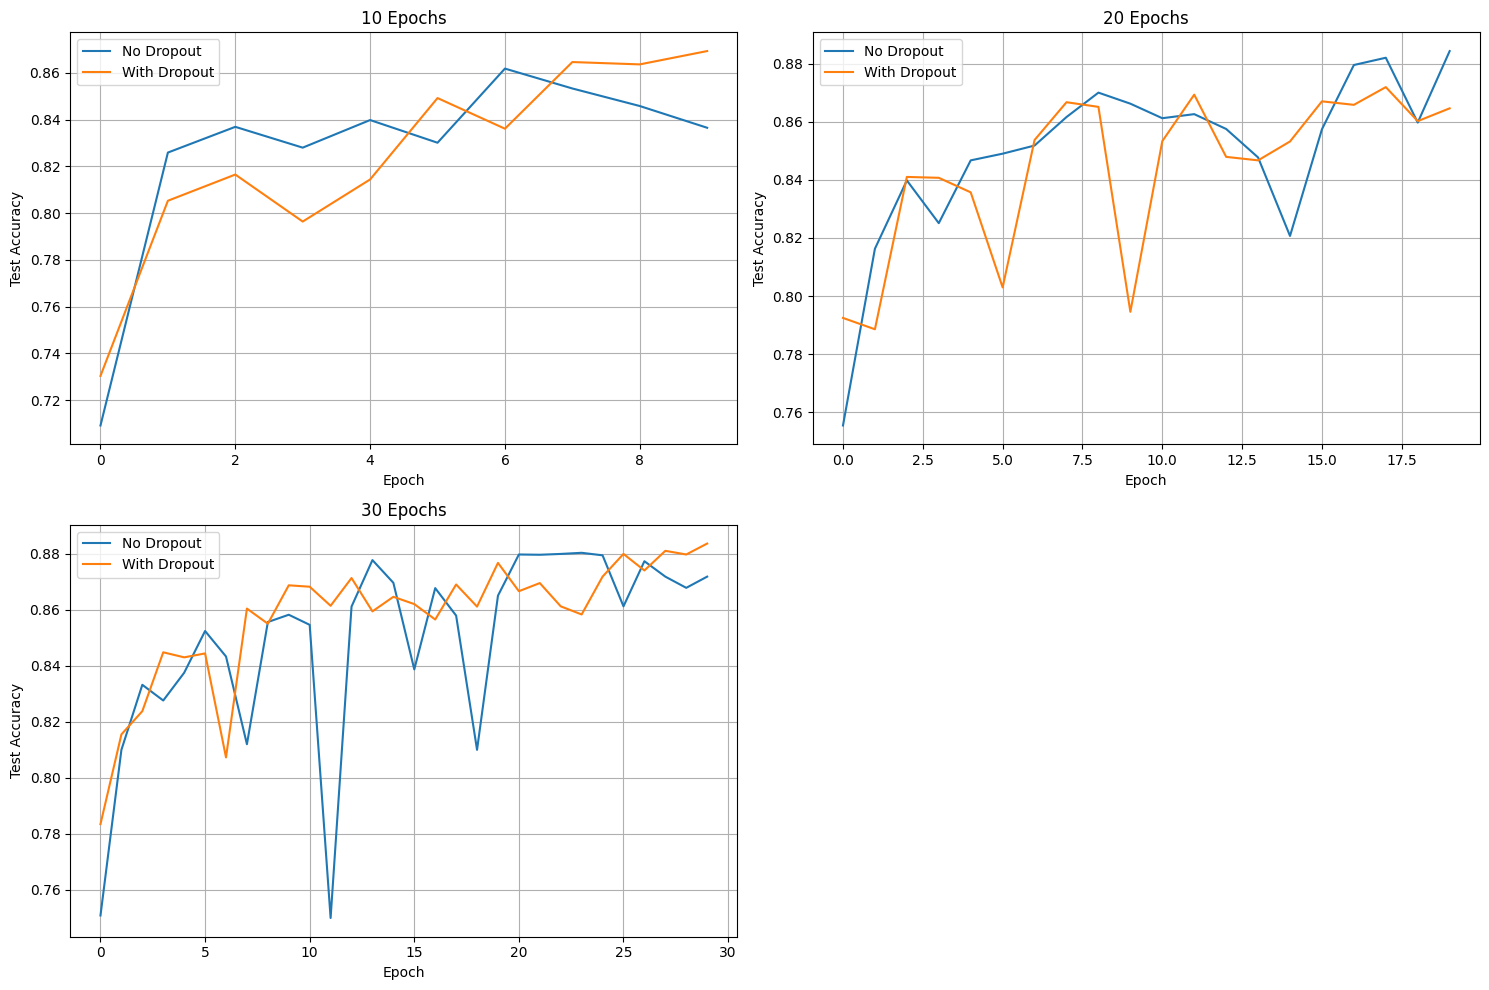

In [8]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from d2l import torch as d2l
import numpy as np
import time

# 设置随机种子以确保结果可复现
torch.manual_seed(42)
np.random.seed(42)

# 加载Fashion-MNIST数据集
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# 定义dropout层函数
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 1:
        return torch.zeros_like(X)
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

# 定义准确率计算函数
def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

# 定义评估准确率函数
def evaluate_accuracy(net, data_iter):
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = d2l.Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

# 定义基础神经网络模型
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 dropout1, dropout2, is_training=True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()
        self.dropout1 = dropout1
        self.dropout2 = dropout2

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        if self.training:
            H1 = dropout_layer(H1, self.dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training:
            H2 = dropout_layer(H2, self.dropout2)
        out = self.lin3(H2)
        return out

# 训练函数
def train_model(net, train_iter, test_iter, num_epochs, lr=0.5):
    loss = nn.CrossEntropyLoss(reduction='none')
    trainer = torch.optim.SGD(net.parameters(), lr=lr)
    
    # 记录训练过程
    train_losses = []
    train_accs = []
    test_accs = []
    
    for epoch in range(num_epochs):
        # 训练
        net.train()
        train_metric = d2l.Accumulator(3)
        for X, y in train_iter:
            trainer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.mean().backward()
            trainer.step()
            train_metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
        
        train_loss = train_metric[0] / train_metric[2]
        train_acc = train_metric[1] / train_metric[2]
        
        # 测试
        test_acc = evaluate_accuracy(net, test_iter)
        
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)
        
        if (epoch + 1) % 5 == 0:
            print(f'Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, '
                  f'Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
    
    return train_losses, train_accs, test_accs

# 实验1：比较不同的dropout概率配置
def experiment_dropout_configs():
    num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256
    num_epochs = 10
    
    # 测试不同的dropout配置
    configs = [
        {'name': 'No Dropout', 'dropout1': 0.0, 'dropout2': 0.0},
        {'name': 'Standard (0.2, 0.5)', 'dropout1': 0.2, 'dropout2': 0.5},
        {'name': 'Swapped (0.5, 0.2)', 'dropout1': 0.5, 'dropout2': 0.2},
        {'name': 'High (0.5, 0.5)', 'dropout1': 0.5, 'dropout2': 0.5},
        {'name': 'Low (0.1, 0.1)', 'dropout1': 0.1, 'dropout2': 0.1}
    ]
    
    results = {}
    for config in configs:
        print(f"\nTesting configuration: {config['name']}")
        net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 config['dropout1'], config['dropout2'])
        train_losses, train_accs, test_accs = train_model(
            net, train_iter, test_iter, num_epochs)
        
        results[config['name']] = {
            'train_losses': train_losses,
            'train_accs': train_accs,
            'test_accs': test_accs
        }
    
    return results

# 实验2：比较不同训练轮数的效果
def experiment_training_epochs():
    num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256
    
    # 测试不同的训练轮数
    epochs = [10, 20, 30]
    results = {}
    
    for num_epochs in epochs:
        print(f"\nTesting with {num_epochs} epochs")
        
        # 不使用dropout
        print("Without Dropout:")
        net_no_dropout = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                            0.0, 0.0)
        train_losses_no, train_accs_no, test_accs_no = train_model(
            net_no_dropout, train_iter, test_iter, num_epochs)
        
        # 使用dropout
        print("\nWith Dropout (0.2, 0.5):")
        net_with_dropout = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                             0.2, 0.5)
        train_losses_with, train_accs_with, test_accs_with = train_model(
            net_with_dropout, train_iter, test_iter, num_epochs)
        
        results[num_epochs] = {
            'no_dropout': {
                'train_losses': train_losses_no,
                'train_accs': train_accs_no,
                'test_accs': test_accs_no
            },
            'with_dropout': {
                'train_losses': train_losses_with,
                'train_accs': train_accs_with,
                'test_accs': test_accs_with
            }
        }
    
    return results

# 绘制结果
def plot_results(results, experiment_type):
    if experiment_type == 'dropout_configs':
        plt.figure(figsize=(15, 5))
        
        # 绘制训练准确率
        plt.subplot(1, 2, 1)
        for name, data in results.items():
            plt.plot(data['train_accs'], label=name)
        plt.title('Training Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        
        # 绘制测试准确率
        plt.subplot(1, 2, 2)
        for name, data in results.items():
            plt.plot(data['test_accs'], label=name)
        plt.title('Test Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.savefig('dropout_configs_comparison.png')
        plt.close()
        
    elif experiment_type == 'training_epochs':
        plt.figure(figsize=(15, 10))
        
        for i, (epochs, data) in enumerate(results.items()):
            plt.subplot(2, 2, i+1)
            plt.plot(data['no_dropout']['test_accs'], label='No Dropout')
            plt.plot(data['with_dropout']['test_accs'], label='With Dropout')
            plt.title(f'{epochs} Epochs')
            plt.xlabel('Epoch')
            plt.ylabel('Test Accuracy')
            plt.legend()
            plt.grid(True)
        
        plt.tight_layout()
        # plt.savefig('training_epochs_comparison.png')
        plt.show()
        # plt.close()

if __name__ == "__main__":
    print("Running Dropout Experiments...")
    
    print("\nExperiment 1: Comparing different dropout configurations")
    dropout_results = experiment_dropout_configs()
    plot_results(dropout_results, 'dropout_configs')
    
    print("\nExperiment 2: Comparing different training epochs")
    epochs_results = experiment_training_epochs()
    plot_results(epochs_results, 'training_epochs')
    
    # print("\nExperiments completed. Results have been saved as PNG files.") 